# Руководство по использованию библиотеки ChemX Client

**Добро пожаловать!**

Это руководство — ваш полный гид по работе с библиотекой `chemx-client`. Здесь вы узнаете, как легко и эффективно получать данные о наноматериалах из ChemX API, проводить их первичный анализ и визуализировать результаты.

Библиотека `chemx-client` была создана, чтобы избавить вас от рутины написания HTTP-запросов и обработки "сырых" JSON-ответов. Вместо этого вы получаете простые и понятные Python-функции, которые возвращают данные сразу в удобном формате Pandas DataFrame.

**Что мы рассмотрим в этом руководстве:**
1.  Установка и настройка: Как быстро начать работу.
2.  Основы работы: Получение данных и готовой аналитики.
3.  Фильтрация данных: Как запрашивать только то, что вам нужно.
4.  Практические примеры: Решение реальных аналитических задач, **включая подготовку данных для Machine Learning**.
5.  Справочник по функциям: Полный список доступных методов.

## Глава 1: Установка и начало работы

### 1.1. Установка библиотек
Для начала работы нам понадобятся сама библиотека `chemx-client`, а также `pandas`, `matplotlib` и `seaborn` для анализа и визуализации. Установим их напрямую с помощью `pip`.

In [17]:
# Устанавливаем или обновляем библиотеку до последней версии с GitHub
!pip install --upgrade git+https://github.com/ai-chem/chemx-client-python

# Устанавливаем библиотеки для анализа и ML
!pip install matplotlib seaborn scikit-learn

# Импортируем все необходимое
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chemx_client.client import ChemXClient, ChemXAPIError

# Для примера с ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Настраиваем стиль для графиков и таблиц для более приятного отображения
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
sns.set_theme(style="whitegrid", palette="viridis")

print("Все готово к работе!")

  Cloning https://github.com/ai-chem/chemx-client-python to /tmp/pip-req-build-g9obn52i
  Running command git clone --filter=blob:none --quiet https://github.com/ai-chem/chemx-client-python /tmp/pip-req-build-g9obn52i
  Resolved https://github.com/ai-chem/chemx-client-python to commit 5d5d8fd0df10ff79edd8628a20d16df4de7930be
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Все готово к работе!


### 1.2. Инициализация клиента
Создадим экземпляр класса `ChemXClient`. Этот объект — наша основная точка входа для всех запросов к API. По умолчанию он уже настроен на работу с публичным сервером ChemX, развернутым на Render.


In [18]:
client = ChemXClient()

# Убедимся, что клиент создан и знает, куда отправлять запросы
print(f"Клиент успешно создан. Целевой URL API: {client.base_url}")

Клиент успешно создан. Целевой URL API: https://chemx-backend.onrender.com/api/v1


## Глава 2: Основы работы с данными

Библиотека предоставляет унифицированный набор методов для каждого домена данных (Cytotox, Nanomag, Nanozymes, Seltox, Synergy). Давайте рассмотрим их.

### 2.1. Получение полного набора данных

Для каждого домена есть метод `get_<domain>_data()`, который загружает все доступные записи. Например, для домена `Nanomag`:

In [19]:
try:
    print("Запрашиваем данные из домена Nanomag...")
    df_nanomag = client.get_nanomag_data()

    print(f"Успешно получено {len(df_nanomag)} записей.")

    # Посмотрим на структуру полученных данных
    print("\nПервые несколько строк таблицы:")
    display(df_nanomag.head())

    print("\nТипы данных в колонках:")
    display(df_nanomag.info())

except ChemXAPIError as e:
    print(f"Произошла ошибка: {e}")

Запрашиваем данные из домена Nanomag...
Успешно получено 2578 записей.

Первые несколько строк таблицы:


,id,zfc_h_meas,htherm_sar,mri_r1,mri_r2,squid_h_max,hc_koe,fc_field_t_numeric,squid_temperature_numeric,squid_sat_mag_numeric,coercivity_numeric,squid_rem_mag_numeric,exchange_bias_shift_oe_numeric,vertical_loop_shift_m_vsl_emu_g_numeric,nanoparticle_id,name,np_shell_2,np_hydro_size,xrd_scherrer_size,emic_size,instrument,core_shell_formula,nanoparticle,np_shell,space_group_core,...,squid_rem_mag_original,exchange_bias_shift_oe_original,vertical_loop_shift_m_vsl_emu_g_original,publication_id,doi,journal,publisher,year,title,pdf,access,access_bool,supp,article_name_folder,supp_info_name_folder,validation_id,comment,has_mistake_in_matadata,verification_required,verified_by,verification_date,source_id,source_table,dbt_loaded_at,dbt_curated_at
0,1263,NaN,NaN,NaN,NaN,30.0,0.0,0.0,300.0,28.2800,232.0,3.2000,NaN,0.00000,12,None,None,None,NaN,None,None,None,BaFe12O19,Fe3O4,p63mc,...,None,None,None,24,10.1007/s00339-017-1034-y,Applied Physics A,Springer Science and Business Media LLC,2017,Exchange bias in barium ferrite/magnetite nano...,s00339-017-1034-y.pdf,0.0,False,0,dataset3_4,0,1,None,None,None,None,None,1,nanomag,1753358263151,1753358263151
1,1262,NaN,NaN,NaN,NaN,30.0,0.0,0.0,300.0,41.2100,1045.0,12.0000,NaN,0.00000,12,None,None,None,NaN,None,None,None,BaFe12O19,Fe3O4,p63mc,...,None,None,None,24,10.1007/s00339-017-1034-y,Applied Physics A,Springer Science and Business Media LLC,2017,Exchange bias in barium ferrite/magnetite nano...,s00339-017-1034-y.pdf,0.0,False,0,dataset3_4,0,1,None,None,None,None,None,1,nanomag,1753358263151,1753358263151
2,1265,NaN,NaN,NaN,NaN,30.0,20.0,2.0,4.0,0.2087,974.0,0.1027,NaN,0.01940,12,None,None,None,NaN,None,None,None,BaFe12O19,Fe3O4,p63mc,...,None,None,None,24,10.1007/s00339-017-1034-y,Applied Physics A,Springer Science and Business Media LLC,2017,Exchange bias in barium ferrite/magnetite nano...,s00339-017-1034-y.pdf,0.0,False,0,dataset3_4,0,1,None,None,None,None,None,1,nanomag,1753358263151,1753358263151
3,1264,NaN,NaN,NaN,NaN,30.0,20.0,2.0,4.0,NaN,1571.0,NaN,NaN,NaN,12,None,None,None,NaN,None,None,None,BaFe12O19,Fe3O4,p63mc,...,None,None,None,24,10.1007/s00339-017-1034-y,Applied Physics A,Springer Science and Business Media LLC,2017,Exchange bias in barium ferrite/magnetite nano...,s00339-017-1034-y.pdf,0.0,False,0,dataset3_4,0,1,None,None,None,None,None,1,nanomag,1753358263151,1753358263151
4,1637,NaN,NaN,NaN,NaN,30.0,20.0,2.0,60.0,0.3547,391.3,0.0275,NaN,-0.00458,20,None,None,None,24.0,None,None,None,BiFeO3,0,r3c,...,None,None,None,318,10.1088/1361-6463/abd432,Journal of Physics D: Applied Physics,IOP Publishing,2021,Exchange bias in BiFeO<sub>3</sub> and Bi<sub>...,abd432.pdf,0.0,False,0,dataset3_68,0,1,None,None,None,None,None,1,nanomag,1753358263151,1753358263151



Типы данных в колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        2578 non-null   int64  
 1   zfc_h_meas                                91 non-null     float64
 2   htherm_sar                                590 non-null    float64
 3   mri_r1                                    434 non-null    float64
 4   mri_r2                                    635 non-null    float64
 5   squid_h_max                               2278 non-null   float64
 6   hc_koe                                    507 non-null    float64
 7   fc_field_t_numeric                        1219 non-null   float64
 8   squid_temperature_numeric                 2321 non-null   float64
 9   squid_sat_mag_numeric                     1995 non-null   float64
 10  coercivity_

None

### 2.2. Получение готовой аналитики

Часто не нужно загружать все "сырые" данные, если на сервере уже есть готовая аналитика. Это экономит время и трафик. Для каждого домена доступны методы для получения статистики.

Например, получим статистику по колонкам и топовым категориям для домена `Seltox`.

In [20]:
try:
    print("--- Запрашиваем статистику по колонкам для домена Seltox ---")
    df_seltox_cols = client.get_seltox_column_stats()
    display(df_seltox_cols)

    print("\n--- Запрашиваем статистику по топовым категориям для домена Seltox ---")
    df_seltox_top = client.get_seltox_top_categories()
    display(df_seltox_top)

except ChemXAPIError as e:
    print(f"Произошла ошибка: {e}")

--- Запрашиваем статистику по колонкам для домена Seltox ---


,column_name,data_type,total_rows,null_count,null_percentage
0,hydrodynamic_diameter_nm,double precision,2513,2244,89.30
1,ph_during_synthesis,double precision,2513,2187,87.03
2,zeta_potential_mv,double precision,2513,2089,83.13
3,concentration_of_precursor_mm,double precision,2513,1743,69.36
4,duration_preparing_extract_min,double precision,2513,1719,68.40
5,temperature_for_extract_c,double precision,2513,1640,65.26
6,solvent_for_extract,text,2513,1598,63.59
7,precursor_of_np,text,2513,1500,59.69
8,concentration,double precision,2513,1390,55.31
9,zoi_np_mm,double precision,2513,1353,53.84



--- Запрашиваем статистику по топовым категориям для домена Seltox ---


,nanoparticle,experiments_count,avg_mic_np_µg_ml,min_mic_np_µg_ml,max_mic_np_µg_ml,unique_publications,unique_bacteria,first_year,last_year
0,Ag,1789,235.106460,0.0,5000.0,116,333,2008,2024
1,ZnO,222,291.220183,0.0,1660.0,10,32,2012,2023
2,CuO,212,1967.100000,98.0,12500.0,5,20,2020,2023
3,TiO2,60,3531.181818,93.0,10000.0,4,23,2017,2022
4,Cu,44,171.250000,20.0,300.0,2,13,2008,2020
5,Fe2O3,36,38.000000,16.0,63.0,2,9,2017,2018
6,Au,31,1265.064516,0.0,10000.0,2,9,2015,2019
7,Fe3O4,29,NaN,NaN,NaN,2,6,2018,2020
8,Al2O3,17,2212.500000,1000.0,6400.0,3,5,2014,2021
9,CeO2,15,3718.000000,1070.0,10000.0,1,5,2020,2020


## Глава 3: Эффективная работа с данными

### 3.1. Фильтрация на стороне сервера

Загружать все данные не всегда эффективно. Если вам нужна только часть данных или вас интересует наночастица с конкретным материалом, лучше отфильтровать их на стороне сервера. Методы `get_<domain>_data()` поддерживают параметр `nanoparticle` для фильтрации.

Давайте получим данные только для наночастиц **'Ag'** из домена `Synergy`.

In [21]:
try:
    print("Запрашиваем данные по Synergy, отфильтрованные по наночастицам 'Ag'...")
    df_ag_synergy = client.get_synergy_data(nanoparticle='Ag')

    print(f"Найдено {len(df_ag_synergy)} записей для 'Ag'.")

    # Убедимся, что в выборке действительно только 'Ag'
    is_only_ag = df_ag_synergy['nanoparticle'].unique() == ['Ag']
    print(f"Все записи содержат только 'Ag': {is_only_ag}")

    display(df_ag_synergy.head())

except ChemXAPIError as e:
    print(f"Произошла ошибка: {e}")

Запрашиваем данные по Synergy, отфильтрованные по наночастицам 'Ag'...
Найдено 1770 записей для 'Ag'.
Все записи содержат только 'Ag': [ True]


,serial_number,nanoparticle_id,nanoparticle,normalized_shape,has_coating,np_size_avg_nm,canonical_name,shape,np_size_min_nm,np_size_max_nm,np_size_min_nm_parsed,zeta_potential_mv,zeta_potential_mv_parsed,synthesis_method,standardized_synthesis_method,coating_with_antimicrobial_peptide_polymers,bacteria_id,bacteria,strain,mdr,drug_id,drug,publication_id,doi,article_list,...,oa_status,pdf,access,access_bool,reference,source_id,source_table,dbt_loaded_at,method,zoi_drug_mm_or_mic__µg_ml,error_zoi_drug_mm_or_mic_µg_ml,zoi_np_mm_or_mic_np_µg_ml,error_zoi_np_mm_or_mic_np_µg_ml,zoi_drug_np_mm_or_mic_drug_np_µg_ml,error_zoi_drug_np_mm_or_mic_drug_np_µg_ml,fold_increase_in_antibacterial_activity,fic,effect,drug_dose_µg_disk,np_concentration_µg_ml,combined_mic,peptide_mic,viability_percent,viability_error,time_hr
0,1,37,Ag,spherical,0,3.0,Ag_spherical_0_3,spherical,2.26,10.34,2.26,None,NaN,chemical_synthesis using sodium borohydride an...,Chemical Synthesis,None,83,Escherichia coli,MTCC 443,None,NaN,None,11,10.1016/j.actbio.2007.11.006,1,...,closed,1_ruparelia2008.pdf,0,False,https://www.sciencedirect.com/science/article/...,1,synergy,1753358263277,MIC,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,24.0
1,2,37,Ag,spherical,0,3.0,Ag_spherical_0_3,spherical,2.26,10.34,2.26,None,NaN,chemical_synthesis using sodium borohydride an...,Chemical Synthesis,None,84,Escherichia coli,MTCC 739,None,NaN,None,11,10.1016/j.actbio.2007.11.006,1,...,closed,1_ruparelia2008.pdf,0,False,https://www.sciencedirect.com/science/article/...,1,synergy,1753358263277,MIC,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,24.0
2,3,37,Ag,spherical,0,3.0,Ag_spherical_0_3,spherical,2.26,10.34,2.26,None,NaN,chemical_synthesis using sodium borohydride an...,Chemical Synthesis,None,78,Escherichia coli,MTCC 1302,None,NaN,None,11,10.1016/j.actbio.2007.11.006,1,...,closed,1_ruparelia2008.pdf,0,False,https://www.sciencedirect.com/science/article/...,1,synergy,1753358263277,MIC,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,24.0
3,4,37,Ag,spherical,0,3.0,Ag_spherical_0_3,spherical,2.26,10.34,2.26,None,NaN,chemical_synthesis using sodium borohydride an...,Chemical Synthesis,None,79,Escherichia coli,MTCC 1687,None,NaN,None,11,10.1016/j.actbio.2007.11.006,1,...,closed,1_ruparelia2008.pdf,0,False,https://www.sciencedirect.com/science/article/...,1,synergy,1753358263277,MIC,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,24.0
4,5,37,Ag,spherical,0,3.0,Ag_spherical_0_3,spherical,2.26,10.34,2.26,None,NaN,chemical_synthesis using sodium borohydride an...,Chemical Synthesis,None,26,Bacillus subtilis,MTCC 441,None,NaN,None,11,10.1016/j.actbio.2007.11.006,1,...,closed,1_ruparelia2008.pdf,0,False,https://www.sciencedirect.com/science/article/...,1,synergy,1753358263277,MIC,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,24.0


## Глава 4: Практические примеры анализа и визуализации

### 4.1. Поиск самых продуктивных источников

**Задача:** Определить, из каких научных статей (по `DOI`) было взято больше всего данных для домена `Nanozymes`.

Это поможет понять, какие исследования являются наиболее фундаментальными в данной области.

Загрузка данных для Nanozymes...


/tmp/ipython-input-3905084341.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_doi.values, y=top_doi.index, palette='mako')


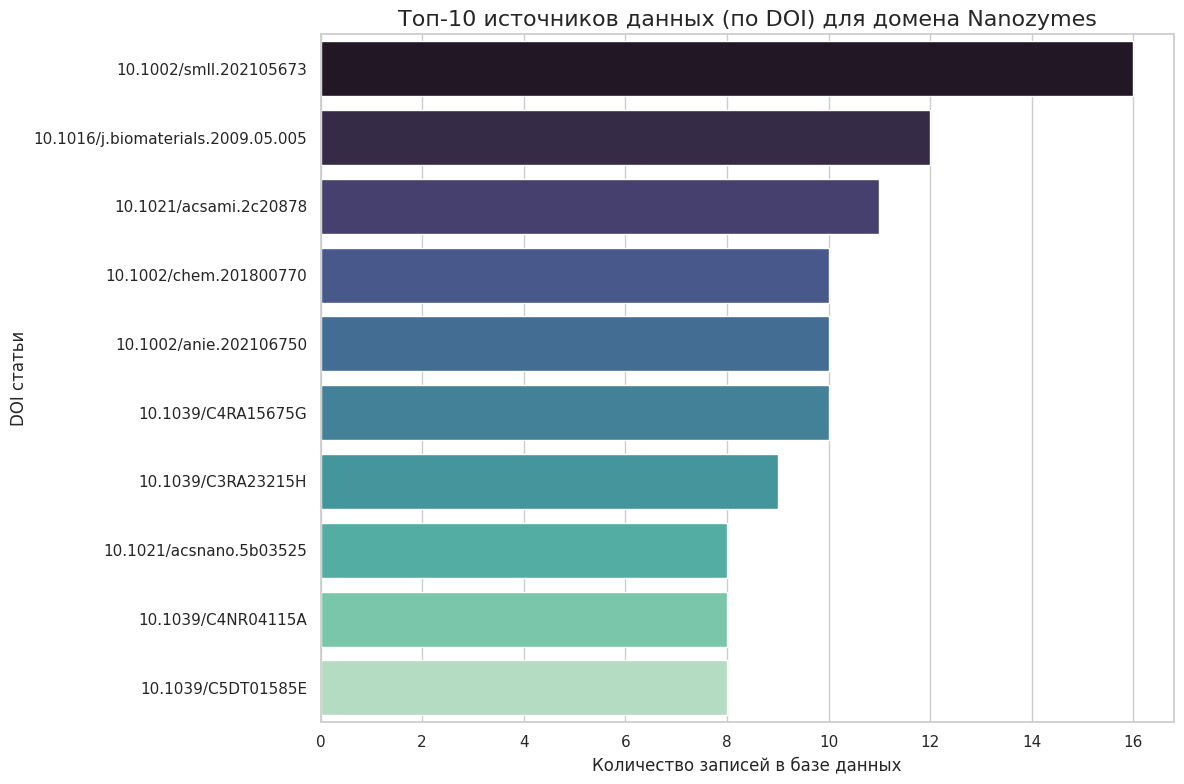

In [22]:
try:
    print("Загрузка данных для Nanozymes...")
    df_nanozymes = client.get_nanozymes_data()

    if not df_nanozymes.empty and 'doi' in df_nanozymes.columns:
        # Считаем количество записей для каждого DOI
        top_doi = df_nanozymes['doi'].value_counts().head(10)

        plt.figure(figsize=(12, 8))
        sns.barplot(x=top_doi.values, y=top_doi.index, palette='mako')

        plt.title('Топ-10 источников данных (по DOI) для домена Nanozymes', fontsize=16)
        plt.xlabel('Количество записей в базе данных', fontsize=12)
        plt.ylabel('DOI статьи', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Данные для анализа отсутствуют.")

except ChemXAPIError as e:
    print(f"Произошла ошибка: {e}")

**Задача:** Построить простую модель для предсказания цитотоксичности (`viability_percent`) на основе физико-химических свойств наночастиц.

Для этого идеально подходят методы `get_<domain>_ml_data()`. Они возвращают данные, которые уже прошли предварительную обработку на сервере: пропуски в числовых и категориальных колонках были заполнены (imputed).

In [ ]:
try:
    print("Загрузка ML-ready данных из домена Cytotox...")
    df_ml_cytotox = client.get_cytotox_ml_data()

    print(f"Успешно загружено {len(df_ml_cytotox)} записей.")

    # Проверим, что пропусков действительно нет (или их очень мало)
    print("\nИнформация о данных (обратите внимание на Non-Null Count):")
    df_ml_cytotox.info()

    # --- Подготовка к обучению модели ---
    # Выбираем числовые признаки для простоты примера
    features = [
        'potential_mv', 'zeta_potential_mv', 'hydrodynamic_nm',
        'size_in_medium_nm', 'np_size_avg_nm', 'no_of_cells_cells_well',
        'concentration', 'time_hr'
    ]
    target = 'viability_percent'

    X = df_ml_cytotox[features]
    y = df_ml_cytotox[target]

    # Разделяем выборку на обучающую и тестовую
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Обучение модели ---
    print("\nОбучаем модель случайного леса (Random Forest)...")
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # --- Оценка модели ---
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"\nМодель обучена! Коэффициент детерминации (R^2) на тестовой выборке: {r2:.3f}")

except ChemXAPIError as e:
    print(f"Произошла ошибка: {e}")
except Exception as e:
    print(f"Произошла другая ошибка при обработке данных: {e}")

## Глава 5: Полный справочник по методам

Ниже представлен полный список всех доступных методов в `ChemXClient` с описанием их назначения.


### 5.1. Методы для получения данных

Эти методы предназначены для загрузки полных наборов данных. Все они возвращают `pandas.DataFrame`.

| Метод | Домен | Описание | Параметры |
|---|---|---|---|
| `get_cytotox_data()` | Cytotox | Получает все данные о цитотоксичности. | `nanoparticle` (str) |
| `get_nanomag_data()` | Nanomag | Получает все данные о магнитных наноматериалах. | `nanoparticle` (str) |
| `get_nanozymes_data()` | Nanozymes | Получает все данные о нанозимах. | `nanoparticle` (str) |
| `get_seltox_data()` | Seltox | Получает все данные о селективной токсичности. | `nanoparticle` (str) |
| `get_synergy_data()` | Synergy | Получает все данные о синергетических эффектах. | `nanoparticle` (str) |

**Пример использования:**


In [23]:
# Получение данных для 'ZnO' из домена Nanomag
df = client.get_nanomag_data(nanoparticle='ZnO')

### 5.2. Методы для получения аналитики

Эти методы возвращают предварительно рассчитанную сервером статистику. Все они также возвращают `pandas.DataFrame`.

#### Статистика по колонкам
Возвращает информацию о количестве записей, пропусков и уникальных значений в каждой колонке.
* `get_cytotox_column_stats()`
* `get_nanomag_column_stats()`
* `get_nanozymes_column_stats()`
* `get_seltox_column_stats()`
* `get_synergy_column_stats()`

#### Статистика по строкам
Возвращает информацию о полноте заполнения каждой строки (записи) в наборе данных.
* `get_cytotox_row_stats()`
* `get_nanomag_row_stats()`
* `get_nanozymes_row_stats()`
* `get_seltox_row_stats()`
* `get_synergy_row_stats()`

#### Статистика по топовым категориям
Возвращает самые часто встречающиеся значения для ключевых категориальных признаков.
* `get_cytotox_top_categories()`
* `get_nanomag_top_categories()`
* `get_nanozymes_top_categories()`
* `get_seltox_top_categories()`
* `get_synergy_top_categories()`

In [24]:
# Получение топовых категорий для домена Nanozymes
df_top = client.get_nanozymes_top_categories()

### 5.3 Методы для получения ML-данных

Эти методы возвращают наборы данных, специально подготовленные для задач машинного обучения (пропуски заполнены, признаки отобраны и т.д.). Они не принимают дополнительных параметров.

| Метод | Домен | Описание |
|---|---|---|
| `get_cytotox_ml_data()` | Cytotox | Получает данные о цитотоксичности. |
| `get_nanomag_ml_data()` | Nanomag | Получает данные о магнитных наноматериалах. |
| `get_nanozymes_ml_data()` | Nanozymes | Получает данные о нанозимах. |
| `get_seltox_ml_data()` | Seltox | Получает данные о селективной токсичности. |
| `get_synergy_ml_data()` | Synergy | Получает данные о синергетических эффектах. |

In [ ]:
df_ml = client.get_synergy_ml_data()
display(df_ml.head())

### 5.4. Обработка ошибок

Все методы могут выбросить исключение `chemx_client.ChemXAPIError` в следующих случаях:
*   Сервер API недоступен (ошибка сети).
*   Сервер вернул ошибку (например, 404 Not Found или 500 Internal Server Error).
*   Ответ сервера не является валидным JSON.

Рекомендуется оборачивать вызовы методов в блок `try...except` для надежной работы вашего кода.

In [25]:
from chemx_client.client import ChemXAPIError

try:
    df = client.get_cytotox_data()
except ChemXAPIError as e:
    print(f"Не удалось получить данные: {e}")